# Comparing polynomial equations (that estimate age related brain changes)

This notebook covers comparing the TOP and StrokeMRI datasets, ina first demo

In [1]:
import os       # using operating system dependent functionality (folders)
import glob
import pandas as pd # data analysis and manipulation
import numpy as np    # numerical computing (manipulating and performing operations on arrays of data)


import matplotlib.pyplot as plt
import seaborn as sns

import sys
sys.path.insert(0, '../') # path to functions
from cvasl import file_handler as fh # 
from cvasl import mold #
from cvasl import carve
from cvasl import seperated
from cvasl.file_handler import Config

In [2]:
# set up data pull
config = Config()
root_mri_directory = config.get_directory('raw_data')

## Let's look through the top and stroke MRI datasets and derive our optimal second degree equasions. We will start with TOP

In [3]:
top = os.path.join(root_mri_directory, 'assembled/top_stitched.csv')
stroke_mri = os.path.join(root_mri_directory, 'assembled/StrokeMRI_stitched.csv')

In [4]:
dataframe_top = pd.read_csv(top)
dataframe_stroke_mri = pd.read_csv(stroke_mri)

In [5]:
#dataframe_top.columns

Coefficents for 2 degree polynomial: [-1.18633655e-05 -2.15086048e-03  7.95379583e-01]


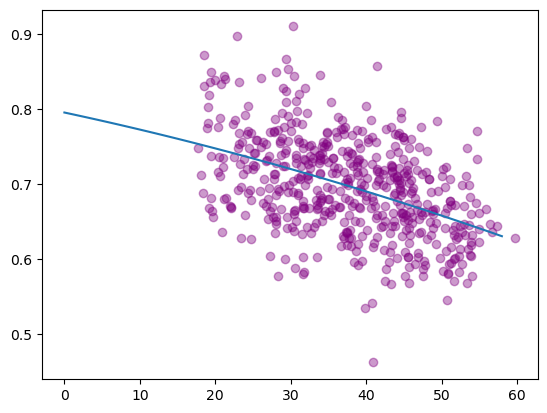

In [15]:
top_polynomial = seperated.polyfit_and_show(
        dataframe_top,
        'Age',
        'GM_vol_Liter',
        2,
        color1='purple',
)

# Now we derive some facts about the distribution of data in top dataset compared to it's idealized polynomial

Our x axis is age, our y axis is the dependant variable. We want to ask how much this dependant variable varies from the derived polynomial

First, we want to say for each point what is the difference in y on the polynomial versus y on reality

In [16]:
def derived_function(column,a,b,c):
    list_output = []
    for value in column:
        output = a * (value**2) + b* value + c
        list_output.append(output)
    return list_output

In [17]:
estimated_by_top = derived_function(dataframe_top['Age'], -1.18633655e-05, -2.15086048e-03,  7.95379583e-01)

In [18]:
dataframe_for_difference_top = dataframe_top[['Age', 'GM_vol_Liter']]
dataframe_for_difference_top['predicted'] = estimated_by_top
dataframe_for_difference_top.sort_values(by=['Age'])

C:\Users\makeda\AppData\Local\Temp\ipykernel_24700\1420052943.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataframe_for_difference_top['predicted'] = estimated_by_top


,Age,GM_vol_Liter,predicted
162,17.72,0.74748,0.753541
140,18.15,0.71192,0.752433
87,18.40,0.68888,0.751787
260,18.49,0.87205,0.751554
237,18.52,0.83028,0.751477
...,...,...,...
482,55.85,0.66638,0.638250
247,56.40,0.64699,0.636334
419,56.67,0.63622,0.635391
354,57.39,0.64494,0.632868


In [19]:
dataframe_for_difference_top['differences'] = dataframe_for_difference_top['predicted'] - dataframe_for_difference_top['GM_vol_Liter']
dataframe_for_difference_top['absolute_differences'] = abs(dataframe_for_difference_top['differences'])
dataframe_for_difference_top.describe()

C:\Users\makeda\AppData\Local\Temp\ipykernel_24700\460825284.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataframe_for_difference_top['differences'] = dataframe_for_difference_top['predicted'] - dataframe_for_difference_top['GM_vol_Liter']
C:\Users\makeda\AppData\Local\Temp\ipykernel_24700\460825284.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataframe_for_difference_top['absolute_differences'] = abs(dataframe_for_difference_top['differences'])


,Age,GM_vol_Liter,predicted,differences,absolute_differences
count,531.000000,531.000000,531.000000,531.000000,531.000000
mean,37.548889,0.696949,0.696804,-0.000145,0.046591
std,9.581361,0.065002,0.029108,0.058052,0.034573
min,17.720000,0.462590,0.624406,-0.190566,0.000085
25%,30.260000,0.651255,0.674728,-0.038089,0.019834
50%,37.730000,0.695710,0.697339,-0.001145,0.039365
75%,44.950000,0.739395,0.719432,0.040779,0.068163
max,59.780000,0.909940,0.753541,0.224849,0.224849


So we see our mean absolute diference and max difference from this ideal polynomial i.e. .046591 and 0.224849.We also see other aspects of distribution.

## We can ask if the polynomial will work for the other dataset (in this case StrokeMRI).

In [20]:
estimated_stroke_mri = derived_function(dataframe_stroke_mri['Age'], -1.18633655e-05, -2.15086048e-03,  7.95379583e-01)

In [21]:
#dataframe_stroke_mri

In [22]:
dataframe_for_difference_mri = dataframe_stroke_mri[['Age', 'GM_vol']]
dataframe_for_difference_mri['predicted'] = estimated_stroke_mri
dataframe_for_difference_mri.sort_values(by=['Age'])

C:\Users\makeda\AppData\Local\Temp\ipykernel_24700\222408637.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataframe_for_difference_mri['predicted'] = estimated_stroke_mri


,Age,GM_vol,predicted
284,20.505464,0.63411,0.746287
185,20.979250,0.80330,0.745035
108,23.483607,0.69681,0.738327
192,24.562856,0.72483,0.735391
440,25.386301,0.78036,0.733132
...,...,...,...
54,85.776832,0.50279,0.523599
491,85.816139,0.64732,0.523434
231,88.825294,0.53233,0.510728
562,92.049315,0.48135,0.496875


In [23]:
dataframe_for_difference_mri['differences'] = dataframe_for_difference_mri['predicted'] - dataframe_for_difference_mri['GM_vol']
dataframe_for_difference_mri['absolute_differences'] = abs(dataframe_for_difference_mri['differences'])
dataframe_for_difference_mri.describe()

C:\Users\makeda\AppData\Local\Temp\ipykernel_24700\357242579.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataframe_for_difference_mri['differences'] = dataframe_for_difference_mri['predicted'] - dataframe_for_difference_mri['GM_vol']
C:\Users\makeda\AppData\Local\Temp\ipykernel_24700\357242579.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataframe_for_difference_mri['absolute_differences'] = abs(dataframe_for_difference_mri['differences'])


,Age,GM_vol,predicted,differences,absolute_differences
count,589.000000,588.000000,589.000000,588.000000,588.000000
mean,60.793483,0.624419,0.618385,-0.005970,0.042219
std,14.209216,0.063293,0.049458,0.052765,0.032161
min,20.505464,0.469790,0.485440,-0.175804,0.000159
25%,51.172603,0.579063,0.580412,-0.039083,0.017838
50%,65.345205,0.621630,0.604175,-0.002387,0.034571
75%,71.638356,0.660813,0.654249,0.029287,0.061159
max,94.668493,0.893730,0.746287,0.126487,0.175804


So our max difference is actually lower...So in this case one "fits " within the distribution of the other..let's already automate that check a bit:

In [24]:
top_dif_dist = dataframe_for_difference_top.describe()
mri_dif_dist = dataframe_for_difference_mri.describe()

In [25]:
# if this number is positive or zero we are golden!
outer_top_minus_outer_mri_top_poly =top_dif_dist['absolute_differences']['max'] - mri_dif_dist['absolute_differences']['max']
outer_top_minus_outer_mri_top_poly

0.04904574605390005

Now we need to do this for every column, and this is R1 , experiment one.

But we should also do what we just did the other way (see if a strokeMRI derived polynomial will correctly fit the topd dataset)

 Let's do an example for R1, experiment 2

Coefficents for 2 degree polynomial: [ 5.86414915e-06 -3.40033403e-03  8.07896885e-01]


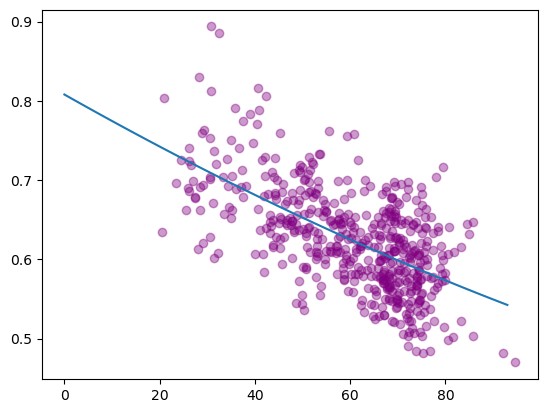

In [26]:
mri_polynomial = seperated.polyfit_and_show(
        dataframe_stroke_mri,
        'Age',
        'GM_vol',
        2,
        color1='purple',
)

In [27]:
estimated_by_mri = derived_function(dataframe_stroke_mri['Age'], 5.86414915e-06, -3.40033403e-03 , 8.07896885e-01)

In [28]:
reverse_dataframe_for_difference_mri = dataframe_stroke_mri[['Age', 'GM_vol']]
reverse_dataframe_for_difference_mri['predicted'] = estimated_by_mri
reverse_dataframe_for_difference_mri.sort_values(by=['Age'])

C:\Users\makeda\AppData\Local\Temp\ipykernel_24700\498655479.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  reverse_dataframe_for_difference_mri['predicted'] = estimated_by_mri


,Age,GM_vol,predicted
284,20.505464,0.63411,0.740637
185,20.979250,0.80330,0.739141
108,23.483607,0.69681,0.731279
192,24.562856,0.72483,0.727913
440,25.386301,0.78036,0.725354
...,...,...,...
54,85.776832,0.50279,0.559373
491,85.816139,0.64732,0.559279
231,88.825294,0.53233,0.552129
562,92.049315,0.48135,0.544586


In [29]:
reverse_dataframe_for_difference_mri['differences'] = reverse_dataframe_for_difference_mri['predicted'] - reverse_dataframe_for_difference_mri['GM_vol']
reverse_dataframe_for_difference_mri['absolute_differences'] = abs(reverse_dataframe_for_difference_mri['differences'])
reverse_dataframe_for_difference_mri.describe()

C:\Users\makeda\AppData\Local\Temp\ipykernel_24700\3020087228.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  reverse_dataframe_for_difference_mri['differences'] = reverse_dataframe_for_difference_mri['predicted'] - reverse_dataframe_for_difference_mri['GM_vol']
C:\Users\makeda\AppData\Local\Temp\ipykernel_24700\3020087228.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  reverse_dataframe_for_difference_mri['absolute_differences'] = abs(reverse_dataframe_for_difference_mri['differences'])


,Age,GM_vol,predicted,differences,absolute_differences
count,589.000000,588.000000,589.000000,588.000000,588.000000
mean,60.793483,0.624419,0.624034,-0.000335,0.041041
std,14.209216,0.063293,0.039038,0.051140,0.030465
min,20.505464,0.469790,0.538548,-0.184950,0.000068
25%,51.172603,0.579063,0.594398,-0.033304,0.017112
50%,65.345205,0.621630,0.610741,0.003449,0.034455
75%,71.638356,0.660813,0.649249,0.035559,0.056836
max,94.668493,0.893730,0.740637,0.120179,0.184950


In [30]:
estimated_by_mri_to_top = derived_function(dataframe_top['Age'], 5.86414915e-06, -3.40033403e-03 , 8.07896885e-01)

In [31]:
reverse_dataframe_for_difference_top = dataframe_top[['Age', 'GM_vol_Liter']]
reverse_dataframe_for_difference_top['predicted'] = estimated_by_mri_to_top
reverse_dataframe_for_difference_top.sort_values(by=['Age'])

C:\Users\makeda\AppData\Local\Temp\ipykernel_24700\1708101690.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  reverse_dataframe_for_difference_top['predicted'] = estimated_by_mri_to_top


,Age,GM_vol_Liter,predicted
162,17.72,0.74748,0.749484
140,18.15,0.71192,0.748113
87,18.40,0.68888,0.747316
260,18.49,0.87205,0.747030
237,18.52,0.83028,0.746934
...,...,...,...
482,55.85,0.66638,0.636280
247,56.40,0.64699,0.634772
419,56.67,0.63622,0.634033
354,57.39,0.64494,0.632066


In [32]:
reverse_dataframe_for_difference_top['differences'] = reverse_dataframe_for_difference_top['predicted'] - reverse_dataframe_for_difference_top['GM_vol_Liter']
reverse_dataframe_for_difference_top['absolute_differences'] = abs(reverse_dataframe_for_difference_top['differences'])
reverse_dataframe_for_difference_top.describe()

C:\Users\makeda\AppData\Local\Temp\ipykernel_24700\565381087.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  reverse_dataframe_for_difference_top['differences'] = reverse_dataframe_for_difference_top['predicted'] - reverse_dataframe_for_difference_top['GM_vol_Liter']
C:\Users\makeda\AppData\Local\Temp\ipykernel_24700\565381087.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  reverse_dataframe_for_difference_top['absolute_differences'] = abs(reverse_dataframe_for_difference_top['differences'])


,Age,GM_vol_Liter,predicted,differences,absolute_differences
count,531.000000,531.000000,531.000000,531.000000,531.000000
mean,37.548889,0.696949,0.689023,-0.007926,0.047079
std,9.581361,0.065002,0.028395,0.058084,0.034873
min,17.720000,0.462590,0.625581,-0.199629,0.000532
25%,30.260000,0.651255,0.666900,-0.046196,0.020469
50%,37.730000,0.695710,0.687950,-0.008056,0.040223
75%,44.950000,0.739395,0.710372,0.032956,0.066486
max,59.780000,0.909940,0.749484,0.215926,0.215926


So here our max difference was 0.215926...very close, and the same with the 50, and 75% of the distributions...close not perfect but close.

## Histogram comparison

We examined the polynomials and the distributions at a coarse level. But we can use hisograms to be more exact.

Let's look at the differences of each off the perfectly fit TOP polynomial. We saw with the describe method 0.25 is probably a good absolute difference; but let's check visually

array([[<AxesSubplot:title={'center':'differences'}>]], dtype=object)

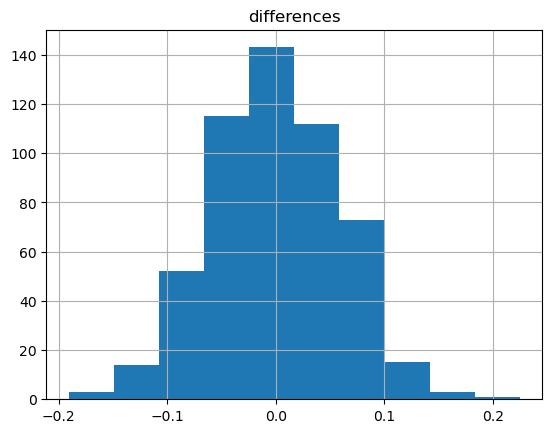

In [33]:
dataframe_for_difference_top.hist(column='differences')

array([[<AxesSubplot:title={'center':'differences'}>]], dtype=object)

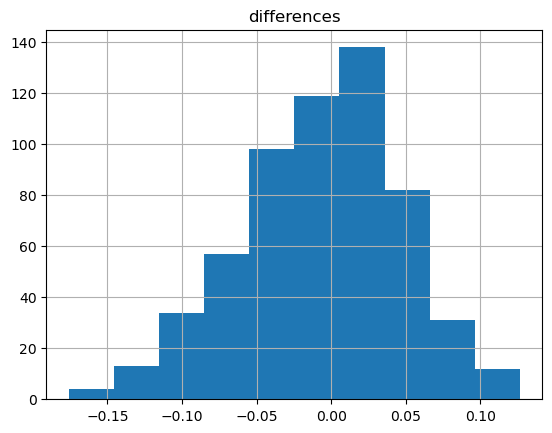

In [34]:
dataframe_for_difference_mri.hist(column='differences')

## Precision histogram comparison.
Let's state the obvious. The datasets are not the same size. One has 588 people, one has 533 or so. We will need to compendate for this.
But first let's now make histograms onto the same scale in terms of the limits.

In [35]:
top_dif_histogram , bin_edges= np.histogram(dataframe_for_difference_top.differences, bins=10, range=(-0.25, 0.25), density=None, weights=None)
mri_dif_histogram , bin_edges = np.histogram(dataframe_for_difference_mri.differences, bins=10, range=(-0.25, 0.25), density=None, weights=None)
#dataframe_for_difference_mri

In [36]:
1000/len(dataframe_for_difference_top)

1.8832391713747645

In [37]:
# rescale values
multiplier = len(dataframe_for_difference_top)/len(dataframe_for_difference_mri)
multiplier

0.9015280135823429

In [38]:
#Now we must rescale the values in dataframe_for_difference_mri
scaled_mri_dif_histogram = mri_dif_histogram * multiplier

Again, let's inspect visually

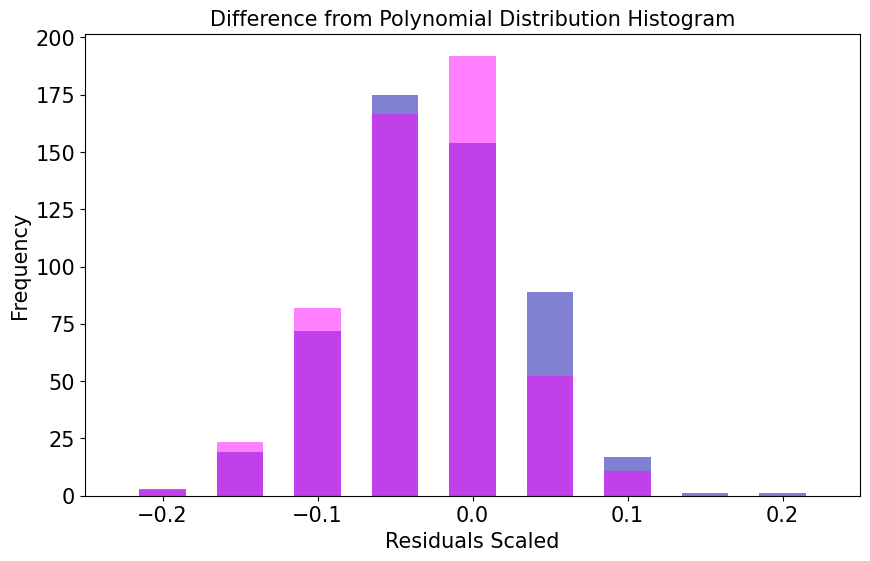

In [39]:
plt.figure(figsize=[10,6])

plt.bar(bin_edges[:10], top_dif_histogram, width = 0.03, color='#0504aa',alpha=0.5)
plt.xlim(min(bin_edges), max(bin_edges))
plt.grid(axis='y', alpha=0.75)
#plt.xlabel('Value Difference',fontsize=15)
#plt.ylabel('Frequency',fontsize=15)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.ylabel('Frequency',fontsize=15)
#plt.title('Difference from Polynomial Distribution Histograms',fontsize=15)
#plt.show()
plt.bar(bin_edges[:10], scaled_mri_dif_histogram, width = 0.03, color='#FF00FF',alpha=0.5)
plt.xlim(min(bin_edges), max(bin_edges))
plt.grid(axis='y', alpha=0.75)
plt.xlabel('Residuals Scaled',fontsize=15)
plt.ylabel('Frequency',fontsize=15)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.ylabel('Frequency',fontsize=15)
plt.title('Difference from Polynomial Distribution Histogram',fontsize=15)
plt.show()

## violin plot between harmonized and non-harmonized dataset!

## add check by features e.g. sex

## Try to find something like Dice score, calculate integral of difference of histograms?

# So we want our histogram to be comparable to other histograms...we can scale every histogram to a 100 patient population,not so coincidentally, 

In [ ]:
scaled_histogram_difference = top_dif_histogram - scaled_mri_dif_histogram
hundred_scaled_histo_diff = scaled_histogram_difference * (100 / len(dataframe_for_difference_top))

In [ ]:
hundred_scaled_histo_diff

In [ ]:
plt.figure(figsize=[10,6])

plt.bar(bin_edges[:10], hundred_scaled_histo_diff, width = 0.03, color='#0504aa',alpha=0.5)
plt.xlim(min(bin_edges), max(bin_edges))
plt.grid(axis='y', alpha=0.75)
plt.xlabel('Value Difference between two distributions',fontsize=15)
#plt.ylabel('Frequency',fontsize=15)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.ylabel('Frequency',fontsize=15)
plt.title('"Residuals" from Polynomial Distribution Histograms both datasets',fontsize=15)
#plt.show()

### So we see the distribution over deciles can differ  but always under 10% of the total patient population. Not impressive, so this supports them having essentially the same population, in a "street logic" sense...this is not a scientific approach, just a reality check 'man on the street' kind of test

## Now let's be more precise and think about histograms of residuals

### Must consult with scientists on precise mechanism to compare across datasets

Let's move on to R1, medthod 2

## Comparing our polynomials with a transformation matrix

In [ ]:
comparable_matrix = seperated.generate_transformation_matrix(tuple(top_polynomial),tuple(mri_polynomial))
comparable_matrix

OK, so we did not do well in terms of a transformation matrix. Our equasions did not come close to an identity matrix, but they give us some idea of what we may expact for things coming off the same machine. In truth this is not so far from an identity matrix (order of magnitude wise)

# Now on to more sophisticated comparison algorithms i.e. COMBAT or method 3

unh, neurocombat is a Python 3.7 tool, and not updated for 2 years...https://github.com/Jfortin1/ComBatHarmonization/tree/master/Python it depends on numpy==1.16.5 and pandas==1.0.3

In [ ]:
print(np.__version__)

In [ ]:
print(pd.__version__)

So in short we will need to check especially if the pandas underlying it will create problems for it now.


This will need some work before we apply the algorithms...but probably our best bet, because it was made for MRI derived values or brain MRI...we will alo create a seperate environment for the COMBAT experiments...it does seem to build in a combo of mamba and pip. 

## Generating transformed data with our matrix and equasions

We have now seen we could transform the data of one into the data on the other...Let's try
first a graph of the diffent polynomials

In [ ]:
top_polynomial1 = seperated.polyfit_and_show(
        dataframe_top,
        'Age',
        'GM_vol_Liter',
        2,
        color1='purple',
)
mri_polynomial2 = seperated.polyfit_and_show(
        dataframe_stroke_mri,
        'Age',
        'GM_vol',
        2,
        color1='orange',
)

# Add histograms of residuals
to be added

In [ ]:
# generate mri_polynomial from top_polynomial and transformation_matrix
matrix1 = seperated.generate_transformation_matrix(top_polynomial1,mri_polynomial2)
pol_made_mri_from_top = (top_polynomial1 * matrix1).sum(axis=1)     
#pol_made_mri_from_top
matrix2 = seperated.generate_transformation_matrix(mri_polynomial2, top_polynomial1)
pol_made_mri_topish = (mri_polynomial2 * matrix2).sum(axis=1)     
pol_made_mri_topish

In [ ]:
pol_made_mri_from_top 

# Now let's use a  synthetic set to prove a point about how this would transform 

IN both cases the first number in the awway is very close to zero...so we have something close to a line. Therefore we can use simple arethmatic approaches. 

In [ ]:
synthetic_set = dataframe_stroke_mri
synthetic_set['GM_vol2']= synthetic_set['GM_vol'] + 0.2
#synthetic_set[['GM_vol2','GM_vol']]
random_noise = []
for value in synthetic_set['GM_vol2']:
    value = np.random.randint(12)/120
    random_noise.append(value)
synthetic_set['GM_vol_adder']= random_noise
synthetic_set['GM_vol3'] =  synthetic_set['GM_vol'] + synthetic_set['GM_vol_adder']



In [ ]:
synthetic_polynomial1 = seperated.polyfit_and_show(
        synthetic_set,
        'Age',
        'GM_vol3',
        2,
        color1='purple',
)
mri_polynomial2 = seperated.polyfit_and_show(
        dataframe_stroke_mri,
        'Age',
        'GM_vol',
        2,
        color1='orange',
)

Let's see how our transformation matrix does at identifying these purposely different dataset,
remembering we want to think in terms of difference from an identity matrix

In [ ]:
identity_matrix_3 =np.array([[1,0,0],[0,1,0],[0,0,1]] )
identity_matrix_3

In [ ]:
purposely_different_matrix =seperated.generate_transformation_matrix(tuple(synthetic_polynomial1),tuple(mri_polynomial2))
purposely_different_matrix

In [ ]:
identity_matrix_3 - purposely_different_matrix

In [ ]:
identity_matrix_3 - comparable_matrix

It looks like a linear algebra based method is not identifying translated datasets well! Notive the term in the bottom right is the closes, and this is where we would expect translation information

# This must now be automatied for every parameter over these datasets.